In [550]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [551]:
def f(x):
    return 3*x**2 - 4*x + 5

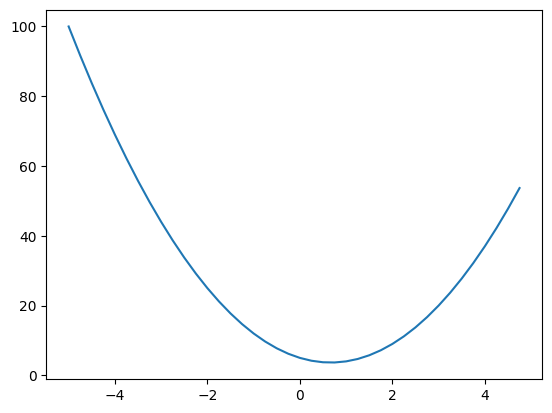

In [552]:
xs = np.arange(-5,5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [553]:
h = 0.00000001
x = 2/3
(f(x+h) - f(x))/h

0.0

In [554]:
def f(a,b,c):
    return a*b + c

In [555]:
a = 2.0
b = -3.0
c = 10.0
f(a,b,c)

4.0

In [556]:
h = 0.0001
d = f(a,b,c)
d1 = f(a+h,b,c)
d2 = f(a,b+h,c)
d3 = f(a,b,c+h)
print('d: ', d, ', d1: ', d1, ', slope wrt a: ', (d1 - d)/h)
print('d: ', d, ', d2: ', d2, ', slope wrt b: ', (d2 - d)/h)
print('d: ', d, ', d2: ', d3, ', slope wrt c: ', (d3 - d)/h)

d:  4.0 , d1:  3.999699999999999 , slope wrt a:  -3.000000000010772
d:  4.0 , d2:  4.0002 , slope wrt b:  2.0000000000042206
d:  4.0 , d2:  4.0001 , slope wrt c:  0.9999999999976694


In [557]:
class Value:
    def __init__(self, data, _children = (), _op = '', label = ''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self) -> str:
        return f"Value(data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad  += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad  += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out

    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad += (other * self.data**(other-1)) * out.grad
        out._backward = _backward

        return out

    def __rmul__(self, other): # other * self
        return self * other

    def __truediv__(self, other): # self / other
        return self * other**-1

    def __neg__(self): # -self
        return self * -1

    def __sub__(self, other): # self - other
        return self + (-other)

    def __radd__(self, other): # other + self
        return self + other

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad = (1 - t**2) * out.grad

        out._backward = _backward

        return out

    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')

        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward

        return out


    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
            for child in v._prev:
                build_topo(child)
            topo.append(v)
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()



a = Value(2.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
e = a*b; e.label = 'e'
f = Value(-2.0, label = 'f')
d = e + c; d.label = 'd'
L = d*f; L.label = 'L'
L

Value(data=-8.0)

In [558]:
a = Value(2.0)
b = Value(3.0)
a-b

Value(data=-1.0)

In [559]:
class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward

    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward

    return out

  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Value(self.data**other, (self,), f'**{other}')

    def _backward():
        self.grad += other * (self.data ** (other - 1)) * out.grad
    out._backward = _backward

    return out

  def __rmul__(self, other): # other * self
    return self * other

  def __truediv__(self, other): # self / other
    return self * other**-1

  def __neg__(self): # -self
    return self * -1

  def __sub__(self, other): # self - other
    return self + (-other)

  def __radd__(self, other): # other + self
    return self + other

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward

    return out

  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')

    def _backward():
      self.grad += out.data * out.grad
    out._backward = _backward

    return out


  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

In [560]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes,edges

def draw_dot(root):
    dot = Digraph(format = 'svg', graph_attr = {'rankdir': 'LR'})
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label = "{%s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name = uid+n._op, label = n._op)
            dot.edge(uid+n._op, uid)
    for n1,n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    return dot

L = d*f

dL/dd= f

dd/dc = 1.0
dd/de = 1.0

d = c+e

we want:

dL/dc = dd/dc * dL/dd (By chain rule)

We want=>  dL/da & dL/db

We know=> dL/de

e = a*b

de/da = b

de/db = a

dL/da = (de/da)*(dL/de)

dL/db = (de/db)*(dL/de)

In [561]:
a.data += 0.01*a.grad
b.data += 0.01*b.grad
c.data += 0.01*c.grad
f.data += 0.01*f.grad

e = a*b
d = e+c
L = d*f

print(L.grad)

0.0


In [562]:
def fun():
    h = 0.0001

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b; e.label = 'e'
    f = Value(-2.0, label = 'f')
    d = e + c; d.label = 'd'
    L = d*f; L.label = 'L'
    L1 = L.data

    a = Value(2.0 + h, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b; e.label = 'e'
    f = Value(-2.0 , label = 'f')
    d = e + c; d.label = 'd'
    L = d*f; L.label = 'L'
    L2 = L.data
    print((L2 - L1)/h)

fun()


6.000000000021544


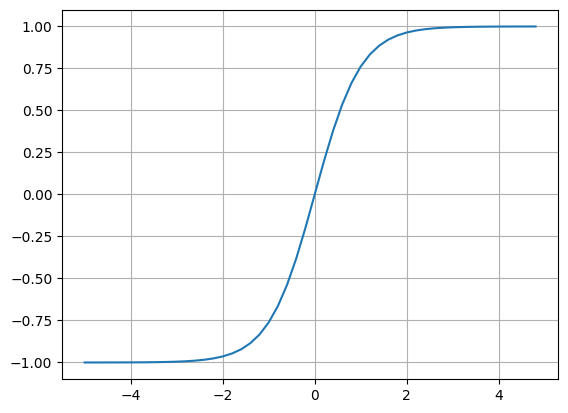

In [563]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2)));plt.grid();

## Building a Single Nueron

In [564]:
# inputs of the nueron
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

# weights of the nueron
w1 = Value(-3.0 , label = 'w1')
w2 = Value(1.0 , label = 'w2')

# bias
b = Value(6.8813735870195432, label = 'b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

### Manual backpropagation

In [565]:
o.grad = 1.0

# do/dn = 1 - o**2| derivative of tanh is 1 - tanh**2
n.grad = 1 - o.data**2

# n = x1w1x2w2 + b
x1w1x2w2.grad = n.grad
b.grad = n.grad

# x1w1x2w2 = x1*w1 + x2*w2
x1w1.grad = x1w1x2w2.grad
x2w2.grad = x1w1x2w2.grad

# x1w1 = x1*w1
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

# x2w2 = x2*w2
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad


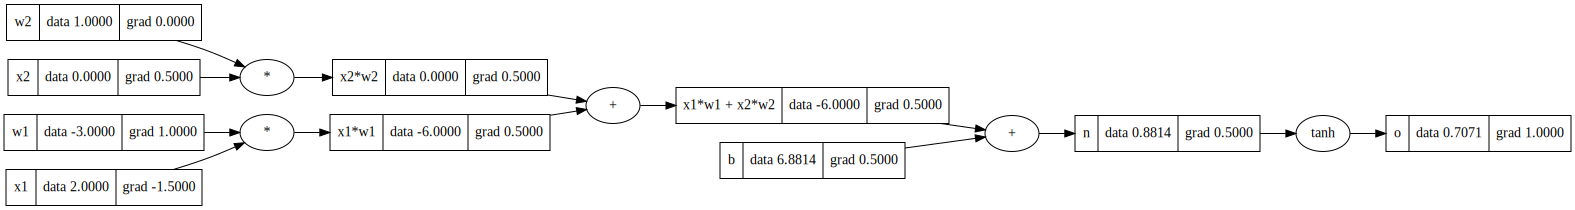

In [566]:
draw_dot(o)

## Implemented backpropagation

In [567]:
# inputs of the nueron
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

# weights of the nueron
w1 = Value(-3.0 , label = 'w1')
w2 = Value(1.0 , label = 'w2')

# bias
b = Value(6.8813735870195432, label = 'b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

In [568]:
o.grad = 1.0
o._backward()
n._backward()
b._backward()
x1w1x2w2._backward()
x1w1._backward()
x2w2._backward()

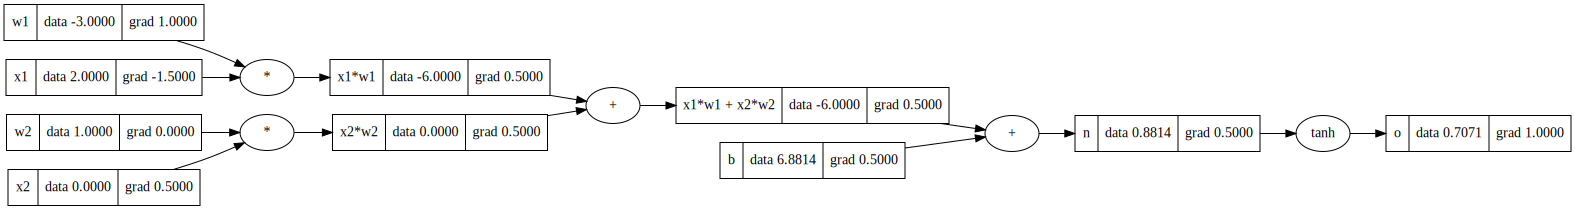

In [569]:
draw_dot(o)

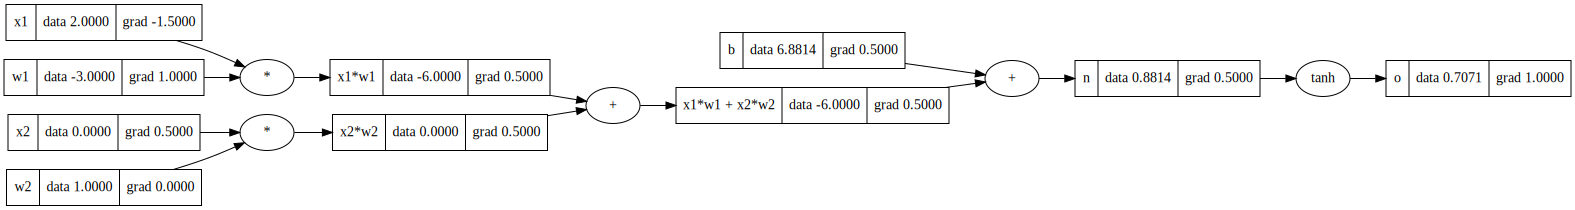

In [570]:
# inputs of the nueron
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

# weights of the nueron
w1 = Value(-3.0 , label = 'w1')
w2 = Value(1.0 , label = 'w2')

# bias
b = Value(6.8813735870195432, label = 'b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

o.grad = 1.0
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
    for child in v._prev:
        build_topo(child)
    topo.append(v)
build_topo(o)

for node in reversed(topo):
    node._backward()

draw_dot(o)

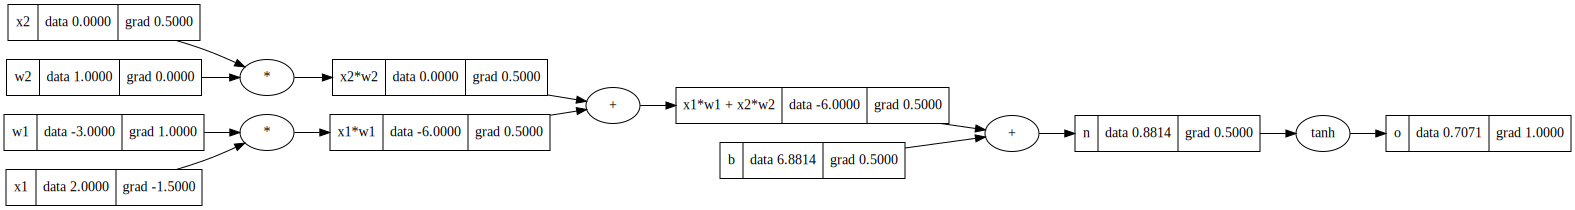

In [571]:
# inputs of the nueron
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

# weights of the nueron
w1 = Value(-3.0 , label = 'w1')
w2 = Value(1.0 , label = 'w2')

# bias
b = Value(6.8813735870195432, label = 'b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

o.backward()
draw_dot(o)

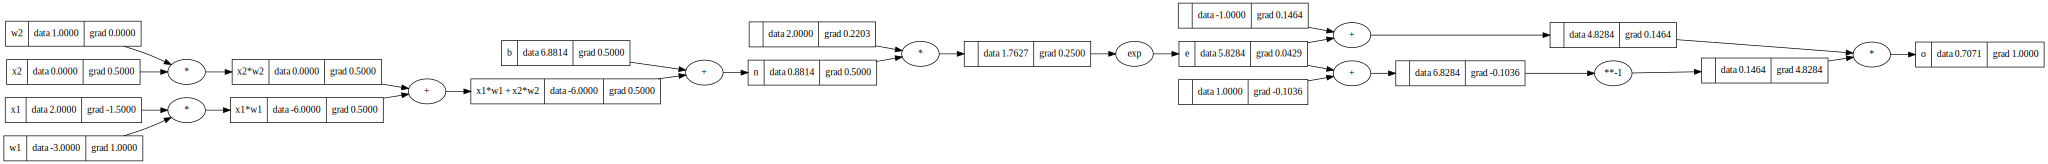

In [572]:
# inputs of the nueron
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

# weights of the nueron
w1 = Value(-3.0 , label = 'w1')
w2 = Value(1.0 , label = 'w2')

# bias
b = Value(6.8813735870195432, label = 'b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# ---
e = (2*n).exp()
e.label = 'e'
o = (e-1)/(e+1)
# ---
o.label = 'o'

o.backward()
draw_dot(o)

In [573]:
import torch

x1 = torch.Tensor([2.0]).double()
x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()
x2.requires_grad = True

w1 = torch.Tensor([-3.0]).double()
w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()
w2.requires_grad = True

b = torch.Tensor([6.8813735870195432]).double()
b.requires_grad = True

n = x1*w1 + x2*w2 + b
o = torch.tanh(n)
o.backward()

print(o.data.item())
print("---")
print('x2: ', x2.grad.item())
print('w2: ', w2.grad.item())
print('x1: ', x1.grad.item())
print('w1: ', w1.grad.item())


0.7071066904050358
---
x2:  0.5000001283844369
w2:  0.0
x1:  -1.5000003851533106
w1:  1.0000002567688737


# Making the Neuron Class

In [574]:
import random
class Neuron:
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))

    def __call__(self, x):
        # n = w*x + b
        act = sum((wi*xi for wi,xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out

    def parameters(self):
        return self.w  +[self.b]

class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs)==1 else outs

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]


In [575]:
x = [2.0 , 3.0, -1.0]
n = MLP(3,[4,4,1])
n(x)

Value(data=-0.7745207364537503)

In [576]:
len(n.parameters())

41

In [577]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]
ys = [1.0, -1.0, -1.0, 1.0] # targets


In [578]:
ypred = [n(x) for x in xs]
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
loss

Value(data=6.382164515240142)

In [579]:
loss.backward()

In [580]:
n.layers[0].neurons[0].w[0].grad

-0.2280864149027484

In [581]:
n.layers[0].neurons[0].w[0].data

-0.5503805826997741

In [606]:
loss.backward()
for p in n.parameters():
    p.data += -0.01 * p.grad

In [607]:
ypred = [n(x) for x in xs]
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
loss

Value(data=0.0019907255299725854)

In [608]:
ypred

[Value(data=0.958345380973783),
 Value(data=-0.9930292338729881),
 Value(data=-0.9937212896455851),
 Value(data=0.9870537858954376)]

# Training loop for the above made neural network

In [628]:
x = [2.0 , 3.0, -1.0]
n = MLP(3,[4,4,1])
# n(x)
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]
ys = [1.0, -1.0, -1.0, 1.0] # targets

In [636]:
losses = []
for k in range(100):
    # forward pass
    ypred = [n(x) for x in xs]
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))

    # before backward pass DO NOT FORGET TO FLUSH ALL THE GRAD to ZERO....
    # Because in the backward function we add onto the existing value of grad
    for p in n.parameters():
        p.grad = 0

    # backward pass
    loss.backward()
    losses.append(loss.data)
    # update
    for p in n.parameters():
        p.data += -0.01 * p.grad

    # print(k, loss.data)


Text(0.5, 1.0, 'LOSS VALUE')

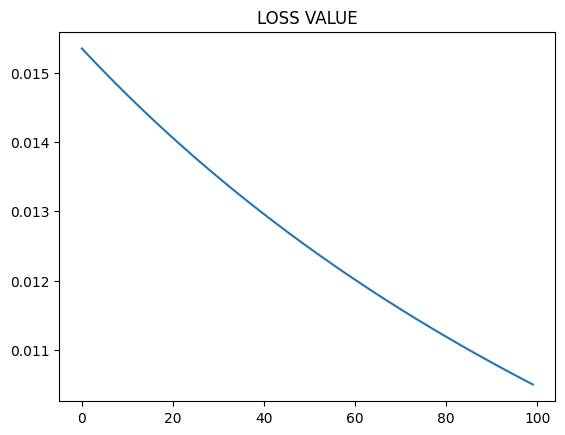

In [637]:
plt.plot(losses)
plt.title("LOSS VALUE")

In [638]:
ypred

[Value(data=0.9510248424849034),
 Value(data=-0.9368275785169493),
 Value(data=-0.9560543216499103),
 Value(data=0.953281989878675)]